# 라이브러리 선언 및 데이터 불러오기

In [1]:
# 데이터 처리 라이브러리
import pandas as pd
import numpy as np

# 머신러닝 라이브러리
from sklearn import tree
from sklearn import ensemble

In [2]:
featuresData = pd.read_csv("../dataset/feature_regression_example.csv")

# A. 데이터 전처리

### A-1. 타입 통합 / 특성 숫자컬럼 추가

In [3]:
featuresData.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155


In [4]:
featuresData.dtypes

REGIONID         object
PRODUCTGROUP     object
PRODUCT          object
ITEM             object
YEARWEEK          int64
YEAR              int64
WEEK              int64
QTY               int64
HOLIDAY          object
HCLUS             int64
PROMOTION        object
PRO_PERCENT     float64
dtype: object

In [5]:
# 데이터 타입 통합
featuresData["REGIONID"] = featuresData["REGIONID"].astype(str)
featuresData["PRODUCTGROUP"] = featuresData["PRODUCTGROUP"].astype(str)

In [6]:
featuresData.dtypes

REGIONID         object
PRODUCTGROUP     object
PRODUCT          object
ITEM             object
YEARWEEK          int64
YEAR              int64
WEEK              int64
QTY               int64
HOLIDAY          object
HCLUS             int64
PROMOTION        object
PRO_PERCENT     float64
dtype: object

In [7]:
# 특성값 숫자컬럼 변경 (상관관계 파악을 위해서 숫자로 변경)

In [8]:
featuresData["PROMOTION_LB"] = np.where(featuresData.PROMOTION == "Y", 1, 0)

In [9]:
# 검증
featuresData.loc [ (featuresData.PROMOTION_LB == 1 ) &
                   (featuresData.PROMOTION!= "Y") ]

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,PROMOTION_LB


In [10]:
featuresData["HOLIDAY_LB"] = np.where(featuresData.HOLIDAY == "Y", 1, 0)

In [11]:
# 검증
featuresData.loc [ (featuresData.HOLIDAY_LB == 1 ) &
                   (featuresData.HOLIDAY!= "Y") ]

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,PROMOTION_LB,HOLIDAY_LB


In [12]:
featuresData.columns

Index(['REGIONID', 'PRODUCTGROUP', 'PRODUCT', 'ITEM', 'YEARWEEK', 'YEAR',
       'WEEK', 'QTY', 'HOLIDAY', 'HCLUS', 'PROMOTION', 'PRO_PERCENT',
       'PROMOTION_LB', 'HOLIDAY_LB'],
      dtype='object')

# A-2 특성 선정 / 데이터 분리

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns # 통계관련된 차트, line plot 지원되면서~
%matplotlib inline

C:\Users\SMART20\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='QTY', ylabel='Density'>

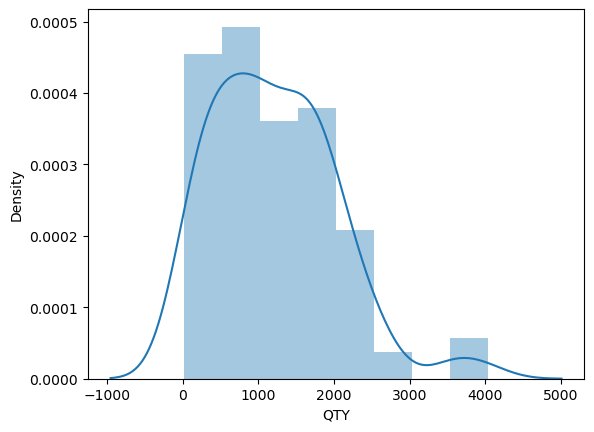

In [14]:
sns.distplot(featuresData["QTY"])

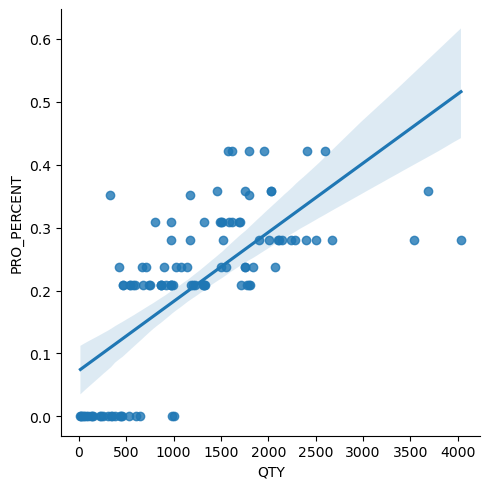

In [15]:
sns.lmplot(data = featuresData, x="QTY", y="PRO_PERCENT")

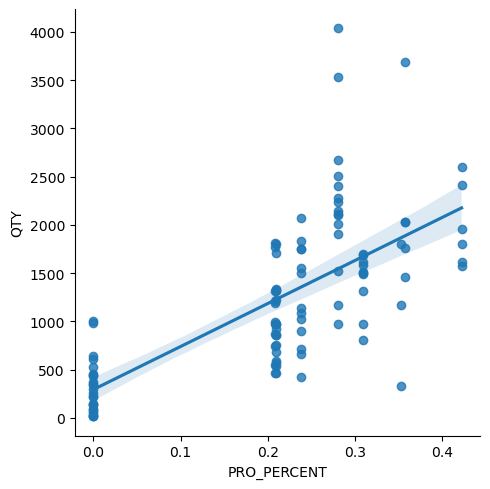

In [16]:
sns.lmplot(data = featuresData, x="PRO_PERCENT", y="QTY")

In [17]:
featuresData.corr()

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,PROMOTION_LB,HOLIDAY_LB
YEARWEEK,1.000000,0.956598,0.275593,0.112267,-0.071586,0.404889,0.205916,0.049867
YEAR,0.956598,1.000000,-0.016493,0.028931,0.028593,0.321193,0.195931,-0.031106
WEEK,0.275593,-0.016493,1.000000,0.289766,-0.339943,0.329705,0.060206,0.273710
QTY,0.112267,0.028931,0.289766,1.000000,-0.537230,0.700195,0.612451,0.505932
HCLUS,-0.071586,0.028593,-0.339943,-0.537230,1.000000,-0.545619,-0.374072,-0.974601
PRO_PERCENT,0.404889,0.321193,0.329705,0.700195,-0.545619,1.000000,0.898554,0.487062
PROMOTION_LB,0.205916,0.195931,0.060206,0.612451,-0.374072,0.898554,1.000000,0.365148
HOLIDAY_LB,0.049867,-0.031106,0.273710,0.505932,-0.974601,0.487062,0.365148,1.000000


In [18]:
# 특성 선정
corrDf = featuresData.corr()
stdCorr = 0.5

In [19]:
corrDf.loc [ ( abs(corrDf.QTY) >= stdCorr) & (corrDf.QTY != 1) ]

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,PROMOTION_LB,HOLIDAY_LB
HCLUS,-0.071586,0.028593,-0.339943,-0.537230,1.000000,-0.545619,-0.374072,-0.974601
PRO_PERCENT,0.404889,0.321193,0.329705,0.700195,-0.545619,1.000000,0.898554,0.487062
PROMOTION_LB,0.205916,0.195931,0.060206,0.612451,-0.374072,0.898554,1.000000,0.365148
HOLIDAY_LB,0.049867,-0.031106,0.273710,0.505932,-0.974601,0.487062,0.365148,1.000000


In [20]:
# 문제 대상 컬럼
features = list (corrDf.loc [ ( abs(corrDf.QTY) >= stdCorr) & (corrDf.QTY != 1) ].index )
features

['HCLUS', 'PRO_PERCENT', 'PROMOTION_LB', 'HOLIDAY_LB']

In [21]:
# 라벨 세팅
label = ["QTY"]

In [22]:
# 데이터 분리

stdRatio = 0.7
stdIndex = int( featuresData.shape[0] * stdRatio )
stdIndex # 73 이전은 훈련 데이터, 이후는 테스트 데이터로 분리

73

In [23]:
featuresData.loc[stdIndex].YEARWEEK # 이전은 훈련 데이터, 이후는 테스트 데이터

201621

In [24]:
trainingData = featuresData.loc[ 0:stdIndex, : ]
testData = featuresData.loc [ stdIndex+1: , : ]

In [25]:
print (trainingData.shape)
print (testData.shape)

(74, 14)
(31, 14)


In [26]:
trainingDataFeatures = featuresData.loc[ 0:stdIndex, features]
trainingDataLabel = featuresData.loc[ 0:stdIndex, label]
testDataFeatures = featuresData.loc [ stdIndex+1: , features ]
testDataLabel = featuresData.loc [ stdIndex+1: , label ]

In [27]:
print (trainingDataFeatures.shape) # 문제지
print (trainingDataLabel.shape) # 정답지
print (testDataFeatures.shape) # 문제지
print (testDataLabel.shape) # 정답지

(74, 4)
(74, 1)
(31, 4)
(31, 1)


In [28]:
corrDf = featuresData.corr()

In [29]:
qtyCorr = corrDf.loc[:, ["QTY"]].sort_values(by=["QTY"], ascending = False)

<AxesSubplot:>

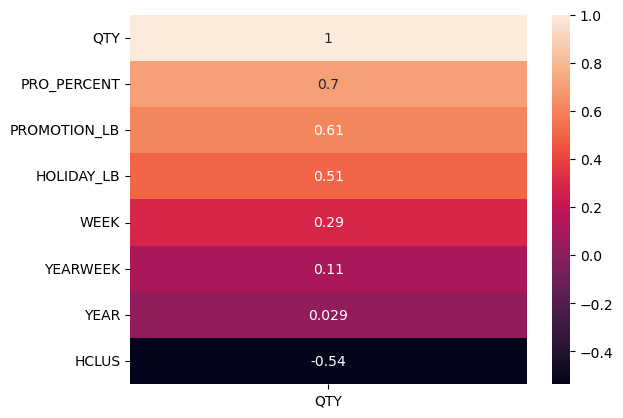

In [30]:
sns.heatmap( qtyCorr, annot=True)

# B. 모델 적용

## B-3. 모델적용

In [31]:
from sklearn import tree
from sklearn import ensemble

In [32]:
dtModel = tree.DecisionTreeRegressor(random_state=10)

In [33]:
# 훈련된 결과를 dtModel 안에 저장
dtModel.fit(X=trainingDataFeatures, # 문제지
            y=trainingDataLabel) # 정답지

DecisionTreeRegressor(random_state=10)

In [34]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

[Text(0.6346153846153846, 0.9285714285714286, 'X[1] <= 0.259\nsquared_error = 693384.113\nsamples = 74\nvalue = 1079.541'),
 Text(0.4230769230769231, 0.7857142857142857, 'X[2] <= 0.5\nsquared_error = 285050.27\nsamples = 63\nvalue = 838.984'),
 Text(0.23076923076923078, 0.6428571428571429, 'X[0] <= 3.0\nsquared_error = 73288.876\nsamples = 22\nvalue = 349.818'),
 Text(0.15384615384615385, 0.5, 'X[0] <= 1.5\nsquared_error = 25921.0\nsamples = 2\nvalue = 176.0'),
 Text(0.07692307692307693, 0.35714285714285715, 'squared_error = 0.0\nsamples = 1\nvalue = 337.0'),
 Text(0.23076923076923078, 0.35714285714285715, 'squared_error = 0.0\nsamples = 1\nvalue = 15.0'),
 Text(0.3076923076923077, 0.5, 'squared_error = 74702.26\nsamples = 20\nvalue = 367.2'),
 Text(0.6153846153846154, 0.6428571428571429, 'X[0] <= 3.0\nsquared_error = 201387.029\nsamples = 41\nvalue = 1101.463'),
 Text(0.46153846153846156, 0.5, 'X[1] <= 0.224\nsquared_error = 165625.976\nsamples = 13\nvalue = 1398.154'),
 Text(0.384615

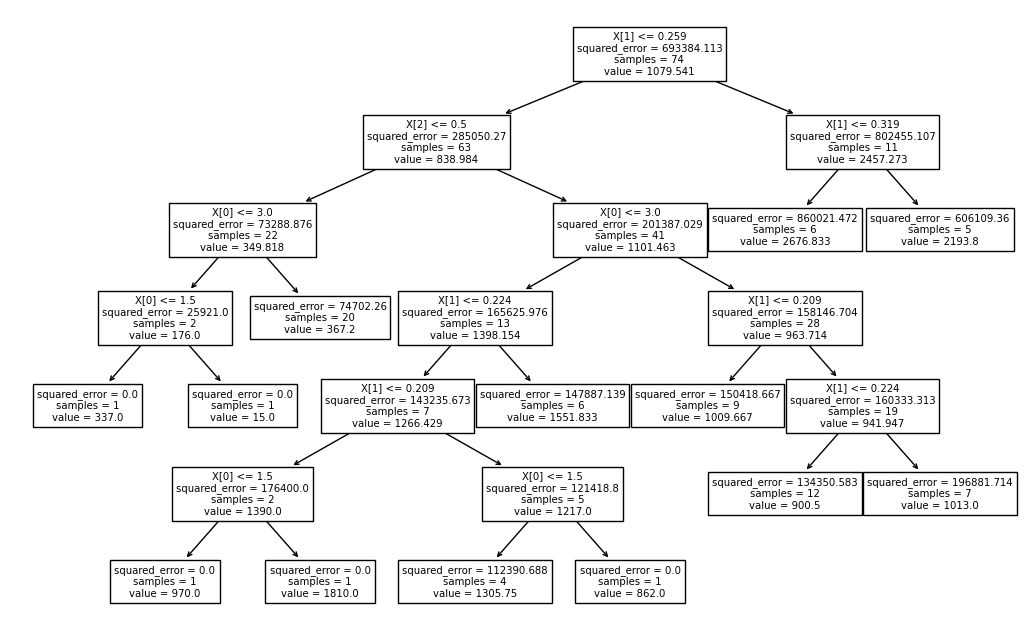

In [35]:
plt.figure(figsize=(13, 8))
plot_tree(dtModel)

# C. 예측/검증

## C-4. 예측

In [36]:
predictValue = dtModel.predict( X = testDataFeatures )  

In [37]:
len(predictValue)

31

## C-5. 데이터 정리

In [38]:
testDataLabel["PREDICT_DT"] = predictValue

In [39]:
testDataLabel.head()

,QTY,PREDICT_DT
74,2282,2676.833333
75,973,2676.833333
76,21,367.200000
77,968,2676.833333
78,1685,2676.833333


# 미래는 어떻게 예측할 것이냐

In [40]:
features

['HCLUS', 'PRO_PERCENT', 'PROMOTION_LB', 'HOLIDAY_LB']

In [41]:
inputHclus = 1 # 대휴일 : 1, 소휴일 : 4
inputProPercent = 0.5 # 프로모션 비율
inputPromotionLb = 1 # 프로모션 적용 Y
inputHlb = 1 # 홀리데이 적용 Y

In [42]:
testData = pd.DataFrame([ [inputHclus,inputProPercent, inputPromotionLb, inputHlb] ])

In [43]:
dtModel.predict(testData)

C:\Users\SMART20\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([2193.8])

In [44]:
inputHclus = 4 # 대휴일 : 1, 소휴일 : 4
inputProPercent = 0 # 프로모션 비율
inputPromotionLb = 0 # 프로모션 적용 N
inputHlb = 0 # 홀리데이 적용 N

In [45]:
testData2 = pd.DataFrame([ [inputHclus,inputProPercent, inputPromotionLb, inputHlb] ])

In [46]:
dtModel.predict(testData2)

C:\Users\SMART20\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([367.2])